# Casimir Diagrams

Software architecture and flow diagrams

## Table of Contents

* [Install Packages](#install-packages)
* [ETL Architecture](#etl-architecture)

## Install Packages

The primary package is [diagrams](https://diagrams.mingrammer.com/), a library for drawing Graphviz diagrams with common architecture components.

In [34]:
from diagrams import Diagram, Edge, Node, Cluster
from diagrams.k8s.compute import StatefulSet
from diagrams.aws.compute import EC2
from diagrams.aws.storage import S3
from diagrams.aws.analytics import Athena, GlueDataCatalog
from diagrams.custom import Custom

## ETL Architecture

> 🚧 This is a work in progress, consider the current diagram a placeholder with no actual impact on development.

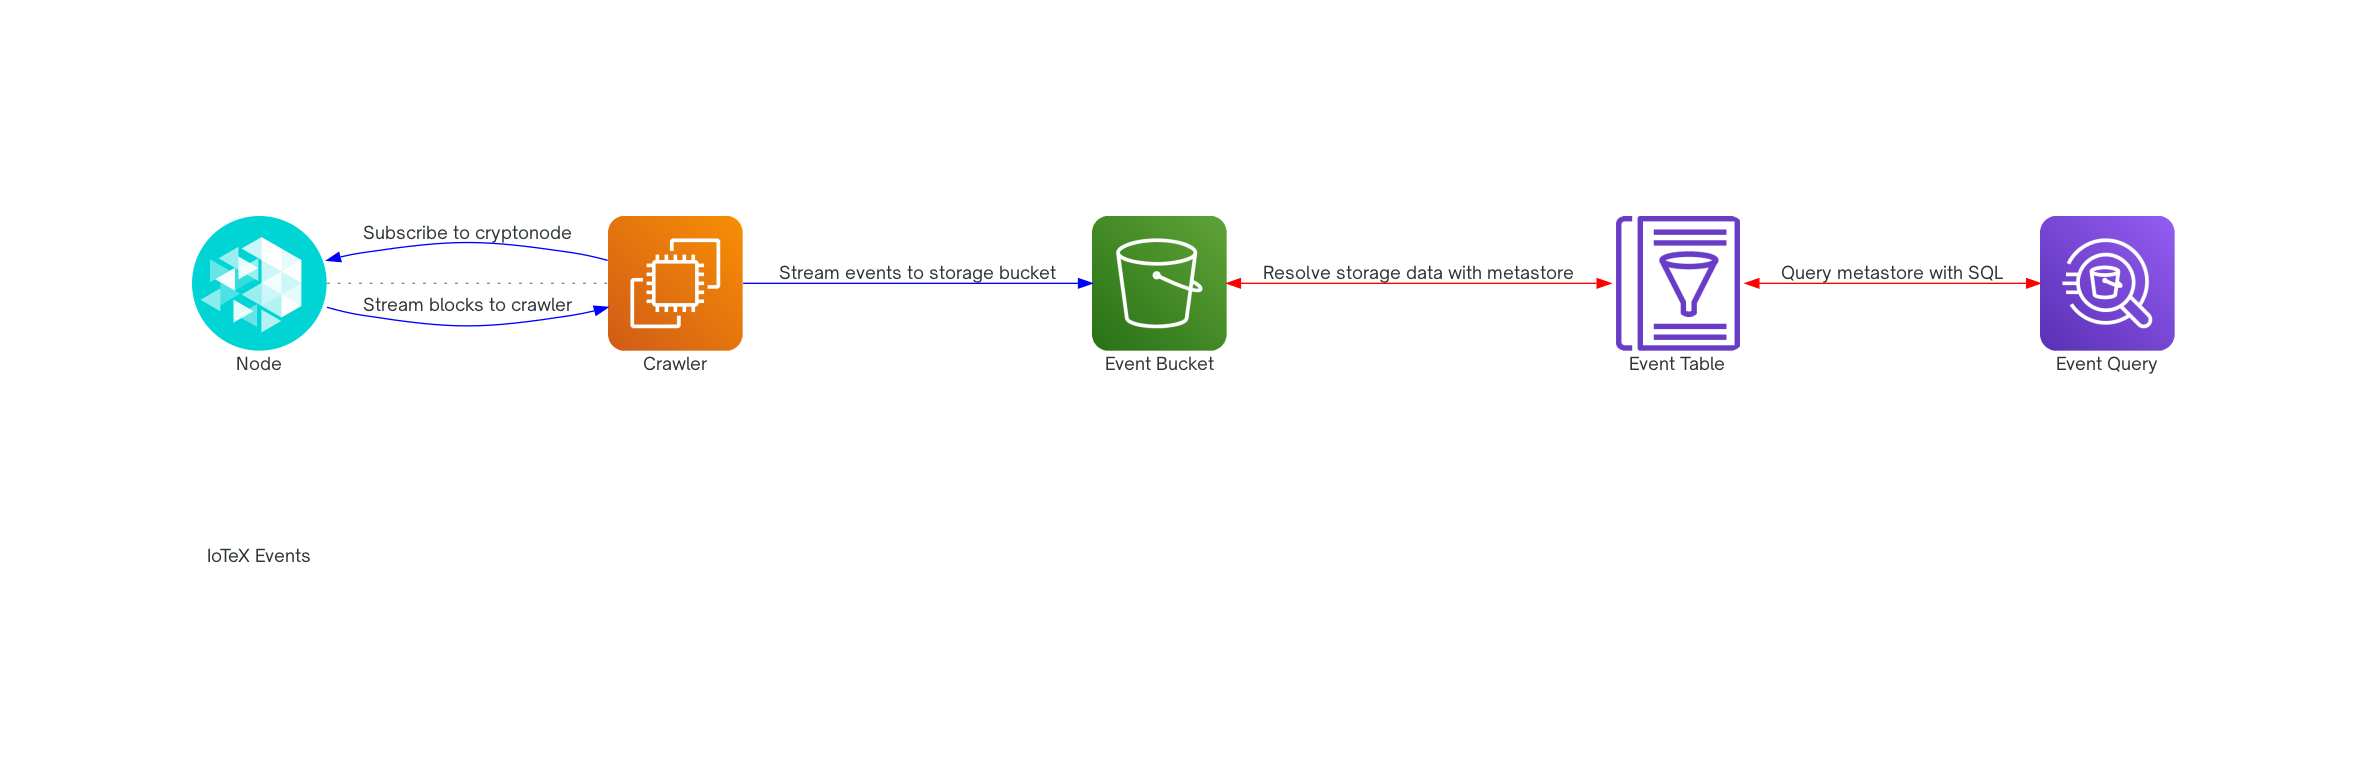

In [35]:
graph_attr = {
    "splines": "spline",
    "concentrate": "true"
}

edge_attr = {
    "fontname": "Open Sauce One"
}

node_attr = {
    "fontname": "Open Sauce One"
}

with Diagram(graph_attr=graph_attr, edge_attr=edge_attr, node_attr=node_attr, show=False, filename="content/diagrams/etl") as etl:
    node_1 = "IoTeX Events"
    Node(label=node_1, shape="plaintext")

    node = Custom("Node", "content/logos/iotex.png")
    crawler = EC2("Crawler")
    event_bucket = S3("Event Bucket")
    event_table = GlueDataCatalog("Event Table")
    event_query = Athena("Event Query")

    with Cluster("AWS ETL"):
        aws_etl = [crawler, event_bucket, event_table, event_query]

    edge_1 = "Subscribe to cryptonode"
    edge_2 = "Stream blocks to crawler"
    edge_3 = "Stream events to storage bucket"

    node << Edge(label=edge_1, color="blue", fontname="Open Sauce One") << crawler
    node - Edge(style="dotted") - crawler
    node >> Edge(label=edge_2, color="blue", fontname="Open Sauce One") >> crawler

    crawler >> Edge(label=edge_3, color="blue", fontname="Open Sauce One") >> event_bucket
    event_bucket >> \
    Edge(label="Resolve storage data with metastore", color="red", fontname="Open Sauce One") << \
    event_table >> \
    Edge(label="Query metastore with SQL", color="red", fontname="Open Sauce One") << \
    event_query

etl